## 01. import required modules

In [9]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.tseries.offsets import *
import urllib3

# change the display and disable warning messages
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
urllib3.disable_warnings()

pd.options.display.max_rows=9999
pd.options.display.max_columns=9999

In [10]:
def two_year_lag(df):
    lag1 = pd.DataFrame()
    lag2 = pd.DataFrame()
    col_list = df.columns
    col_list_lag1 = [i+'_lag1' for i in col_list]
    col_list_lag2 = [i+'_lag2' for i in col_list]
    for col in col_list:
        lag1[col] = df[col].shift(1)
        lag2[col] = df[col].shift(2)
    lag1.columns = col_list_lag1
    lag2.columns = col_list_lag2
    output = pd.concat([lag1,lag2],axis=1)
    output = output.sort_index(axis=1)
    return output

## 02. load data

In [11]:
df_weather = pd.read_csv('weather.csv.gz')
df_weather['time'] = pd.to_datetime(df_weather['time'],format='%Y-%m-%d')
df_weather = df_weather.sort_values(['fsa','time'])

df_weather = df_weather[df_weather['fsa']!='A2E']

## 03. process the data

In [12]:
df_weather = df_weather.assign(daytime=pd.to_datetime(df_weather['sunsetTime'])-pd.to_datetime(df_weather['sunriseTime']))
df_weather['daytime'] = df_weather['daytime'].apply(lambda x: x.total_seconds()/3600)

df_weather = df_weather[['fsa','time', 'daytime','precipIntensity', 'precipProbability', 'feelslikemax', 'feelslikemin',
                         'dewPoint', 'humidity', 'pressure', 'windSpeed', 'windGust','windBearing', 'cloudCover', 'uvIndex', 'visibility', 
                         'tempmin', 'tempmax','moonPhase']]

In [13]:
df_weather

,fsa,time,daytime,precipIntensity,precipProbability,feelslikemax,feelslikemin,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,tempmin,tempmax,moonPhase
110604,K0A,2020-01-01,8.803333,0.010,100.0,27.2,21.2,28.1,88.2,1001.4,13.5,19.5,243.2,55.0,1.0,67.9,30.1,33.8,0.17
180717,K0A,2020-01-02,8.818056,0.010,100.0,35.7,19.7,27.2,78.9,1005.3,12.0,21.9,188.4,47.4,3.0,69.0,25.3,39.5,0.22
25846,K0A,2020-01-03,8.834444,0.000,0.0,35.7,29.7,33.0,81.3,1005.9,8.7,18.3,235.2,57.7,1.0,69.1,34.4,41.0,0.26
486795,K0A,2020-01-04,8.851667,0.020,100.0,31.3,20.4,28.0,86.5,1007.4,10.3,NaN,234.9,61.0,1.0,65.4,28.6,35.5,0.31
21044,K0A,2020-01-05,8.870000,0.000,0.0,18.0,6.1,13.2,75.5,1012.1,14.6,23.0,255.2,49.3,2.0,69.3,11.4,28.2,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732953,P9X,2022-12-29,8.209722,0.016,100.0,26.5,6.2,23.2,96.4,1002.9,7.7,21.7,280.7,85.3,1.0,3.7,15.4,26.5,0.22
337332,P9X,2022-12-30,8.223333,0.000,0.0,2.7,-6.5,4.7,87.2,1012.5,8.9,24.4,242.6,97.7,2.0,12.0,5.7,13.5,0.27
483923,P9X,2022-12-30,8.223333,0.000,0.0,2.7,-6.5,4.7,87.2,1012.5,8.9,24.4,242.6,97.7,2.0,12.0,5.7,13.5,0.27
247615,P9X,2022-12-31,8.238333,0.000,0.0,17.2,-3.4,9.5,90.4,1009.9,5.4,14.5,106.0,99.8,2.0,7.2,5.3,17.2,0.33


In [14]:

# compute 3 year avg.
df_weather['year'] = df_weather['time'].apply(lambda x: x.year)
df_weather['month'] = df_weather['time'].apply(lambda x: x.month)
df_weather['day'] = df_weather['time'].apply(lambda x: x.day)
df_weather = df_weather.sort_values(['fsa','month','day','year'])

df_weather_lag = two_year_lag(df_weather[['daytime','precipIntensity', 
                                          'precipProbability', 'feelslikemax', 'feelslikemin',
                                          'dewPoint','humidity', 'pressure', 'windSpeed', 'windGust', 
                                          'windBearing','cloudCover', 'uvIndex', 'visibility', 
                                          'tempmin','tempmax', 'moonPhase']])

df_weather = df_weather.drop(['daytime','precipIntensity', 
                              'precipProbability', 'feelslikemax', 'feelslikemin',
                              'dewPoint','humidity', 'pressure', 'windSpeed', 'windGust', 
                              'windBearing','cloudCover', 'uvIndex', 'visibility', 
                              'tempmin','tempmax', 'moonPhase'],axis=1)

df_weather = pd.concat([df_weather,df_weather_lag],axis=1)


In [15]:
i = 5
n = len(df_weather.columns) - 1
avg = pd.DataFrame()
while i < n:
    avg[i] = (df_weather.iloc[:,i] + df_weather.iloc[:,i+1])/2
    i+=2
avg.columns = ['avg_cloudCover','avg_daytime','avg_dewPoint','avg_feelslikemax','avg_feelslikemin',
               'avg_humidity','avg_moonPhase','avg_precipIntensity','avg_precipProbability','avg_pressure','avg_tempmax',
               'avg_tempmin','avg_uvIndex','avg_visibility','avg_windBearing','avg_windGust','avg_windSpeed']

df_weather = pd.concat([df_weather[['fsa','time']],avg],axis=1).sort_values(['fsa','time'])

In [25]:
df_weather['fsa'] = df_weather['fsa'].apply(lambda x: 1 if x[0]=='M' else 0)

In [29]:
df_weather = df_weather[df_weather['fsa']==1]

In [30]:
#df_weather['time'] = df_weather['time'].dt.date

df_weather_grouped = df_weather.groupby(['time']).mean().reset_index()

In [31]:
df_weather_grouped.head(10)

,time,fsa,avg_cloudCover,avg_daytime,avg_dewPoint,avg_feelslikemax,avg_feelslikemin,avg_humidity,avg_moonPhase,avg_precipIntensity,avg_precipProbability,avg_pressure,avg_tempmax,avg_tempmin,avg_uvIndex,avg_visibility,avg_windBearing,avg_windGust,avg_windSpeed
0,2020-01-01,1,98.527976,8.974714,43.836310,48.296429,31.425000,93.881548,0.330,0.842655,98.809524,1010.488690,49.186905,38.870833,0.238095,3.547024,314.475000,23.861905,14.661905
1,2020-01-02,1,14.463988,8.994456,29.684524,36.263095,19.545536,81.846845,0.760,0.091815,90.476190,1016.298810,37.800893,28.814881,0.898810,144.717857,179.643750,24.729268,18.124107
2,2020-01-03,1,15.275000,9.009132,21.596429,28.911607,12.476190,78.650565,0.780,0.298542,91.071429,1014.995238,32.570238,22.441071,0.767857,145.779762,260.733929,27.255147,16.108036
3,2020-01-04,1,10.915774,9.024989,17.761607,27.502381,9.354762,75.306339,0.300,0.033929,49.107143,1021.100298,29.132440,20.215774,0.976190,147.655060,205.258333,20.224597,12.712798
4,2020-01-05,1,12.485417,9.042004,24.571131,34.160417,17.693452,77.407708,0.335,0.000208,0.595238,1018.830357,34.879464,26.745833,1.267857,147.277381,220.975298,23.833333,12.097917
5,2020-01-06,1,16.018155,9.060193,28.211607,34.377083,18.332738,78.063839,0.375,0.010060,48.809524,1009.597619,37.060714,29.094940,0.744048,137.949702,165.073214,27.800000,17.038095
6,2020-01-07,1,13.486607,9.079526,19.925595,26.369643,13.753274,70.314881,0.425,0.000119,1.190476,1017.617560,32.107440,25.470833,1.205357,104.940179,281.208333,28.925157,17.538393
7,2020-01-08,1,9.472619,9.099959,14.204464,21.902679,7.204762,68.088333,0.480,0.000595,0.892857,1022.883234,28.654762,18.565774,1.613095,80.604217,289.077083,27.162500,16.408929
8,2020-01-09,1,9.241369,9.121515,12.177381,28.505060,1.004167,67.496577,0.530,0.000893,1.488095,1026.261607,31.065179,12.894643,1.627976,91.444048,196.172917,21.550000,12.422024
9,2020-01-10,1,11.698810,9.144149,19.665179,35.002381,11.038393,62.793393,0.580,0.008750,42.559524,1018.636607,38.555952,24.185119,1.360119,149.938988,286.672024,31.308882,20.582440


In [32]:
df_weather_grouped['time'].max()

Timestamp('2022-12-31 00:00:00')

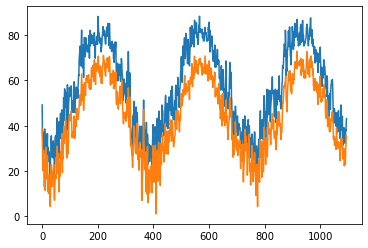

In [33]:
plt.plot(df_weather_grouped['avg_tempmax']) + plt.plot(df_weather_grouped['avg_tempmin'])

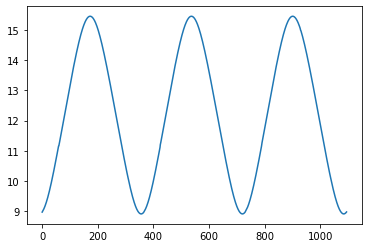

In [34]:
plt.plot(df_weather_grouped['avg_daytime'])

## 04. export as csv

In [35]:
df_weather_grouped.to_csv('weather_data.csv.gz', compression='gzip', index=False)